# Lab 2
<ol>
    <li><a href="#sample">Sampling</a></li>
        <ul><li><a href="#simple">1.1 Simple random sampling</a></li>
        <li><a href="#stratified">1.2 Stratified random sampling</a></li>
        <li><a href="#cluster">1.3 Cluster sampling</a></li>
    </ul>
    <li><a href="#corr">Correlation Analysis</a></li>
</ol>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('customers.csv')

In [11]:
df.head(2)

CLIENTNUM     Attrition_Flag  Age Gender  Dependent_count Education_Level  \
0  768805383  Existing Customer   45      M                3     High School   
1  818770008  Existing Customer   49      F                5        Graduate   

  Marital_Status Income_Category Card_Category  Months_on_book  ...  \
0        Married     $60K - $80K          Blue              39  ...   
1         Single  Less than $40K          Blue              44  ...   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  

[2 rows x 21 columns]

In [12]:
df.describe()

CLIENTNUM           Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

<a id='sample'></a>
# 1. Sampling

<a id="simple"></a>
## 1.1 Simple random sampling

# Complete
**pick the Age column and choose a random sample of 500 elements then plot the sample**

In [13]:
age = df['Age']
len(age)

10127

In [14]:
age

0        45
1        49
2        51
3        40
4        40
         ..
10122    50
10123    41
10124    44
10125    30
10126    43
Name: Age, Length: 10127, dtype: int64

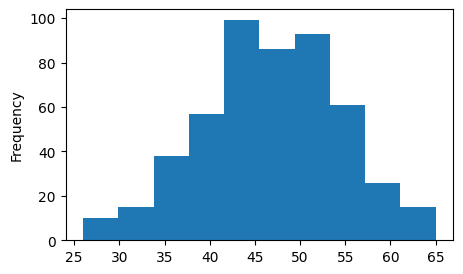

In [19]:
sample = age.sample(500)
sample.plot.hist(figsize=(5,3));

**plot the Age original column and see the difference in both distributions**

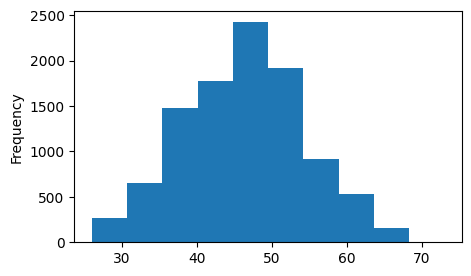

In [18]:
# Your code here
sample = age.sample(len(age))
sample.plot.hist(figsize=(5,3));


**"Random sample usually does not represent the whole dataset"**

<a id="stratified"></a>
## 1.2 Stratified random sampling
* Stratified random sampling is a method of sampling that involves the division of a population into smaller sub-groups known as strata.


* Stratified random sampling is also called proportional random sampling or quota random sampling.

[Stratified random sampling](https://www.investopedia.com/terms/stratified_random_sampling.asp)

# Complete
**Apply the stratified random sampling on the views column with 5 stratified samples and 500 elements in total**

In [16]:
minn = age.min()
maxx = age.max()
diff = (age.max() - age.min())
print('minimum = ', minn)
print('maximum = ', maxx)
print('difference = ', diff)

minimum =  26
maximum =  73
difference =  47


In [21]:
m = age.min()
l = (age.max() - age.min())//5 # length of each interval
g1 = age[age < m+l] # add l to m; beacause we start from m not zero.
g2 = age[(age >= m+l) & (age < m+2*l)] # add 2l to m
g3 = age[(age >= m+2*l) & (age < m+3*l)] # add 3l to m
g4 = age[(age >= m+3*l) & (age < m+4*l)] # add 4l to m
g5 = age[age >= m+4*l] # add 5l to m


In [22]:
print('length of each interval', l)
print("g1 [26:35] = ", len(g1))
print("g2 [35:44] = ", len(g2))
print("g3 [44:53] = ", len(g3))
print("g4 [53:62] = ", len(g4))
print("g5 [62:...] = ", len(g5))

length of each interval 9
g1 [26:35] =  735
g2 [35:44] =  2940
g3 [44:53] =  4148
g4 [53:62] =  1992
g5 [62:...] =  312


In [23]:
groups = {'G1':len(g1), 'G2':len(g2), 'G3':len(g3), 'G4':len(g4), 'G5':len(g5)}
groups_df = pd.DataFrame(groups.values(), columns=['count'], index=groups.keys())
groups_df

count
G1    735
G2   2940
G3   4148
G4   1992
G5    312

<Axes: >

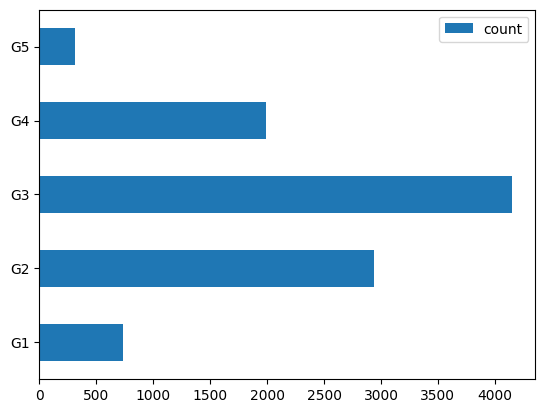

In [25]:
groups_df.plot(kind='barh')

<Axes: >

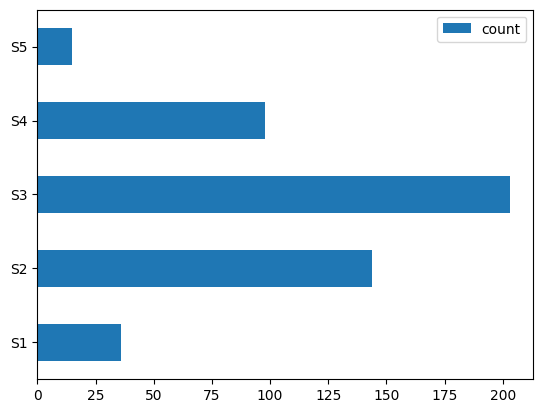

In [32]:
sample_size = 500
total = len(df) # 10127
sample_percentage = round(sample_size / total,3) # 36
# 0.049 * 735 = 36
s1 = g1.sample(round(sample_percentage * len(g1)))

# 0.049 * 3440 = 169
s2 = g2.sample(round(sample_percentage * len(g2)))

# 0.049 * 4535 = 222
s3 = g3.sample(round(sample_percentage * len(g3)))

# 0.049 * 2085 = 102
s4 = g4.sample(round(sample_percentage * len(g4)))

# 0.049 * 312 = 15
s5 = g5.sample(round(sample_percentage * len(g5)))  

samples = ({'S1':len(s1), 'S2':len(s2), 'S3':len(s3), 'S4':len(s4), 'S5':len(s5)})
samples_df = pd.DataFrame(samples.values(), columns=['count'], index=samples.keys())
samples_df.plot(kind='barh')

In [33]:
print("s1= ",len(s1))
print("s2= ",len(s2))
print("s3= ",len(s3))
print("s4= ",len(s4))
print("s5= ",len(s5))

s1=  36
s2=  144
s3=  203
s4=  98
s5=  15


In [34]:
samples = {'S1':len(s1), 'S2':len(s2), 'S3':len(s3), 'S4':len(s4), 'S5':len(s5)}
samples_df = pd.DataFrame(samples.values(), columns=['count'], index=samples.keys())
samples_df

count
S1     36
S2    144
S3    203
S4     98
S5     15

<a id="cluster"></a>
## 1.3 Cluster sampling
1. In cluster sampling, researchers divide a population into smaller groups known as clusters.  They then randomly select among these clusters to form a sample.


2. Cluster sampling is a method of probability sampling that is often used to study large populations, particularly those that are widely geographically dispersed. Researchers usually use pre-existing units such as schools or cities as their clusters.

[Cluster sampling](https://www.scribbr.com/methodology/cluster-sampling/)

## How to cluster sample
1. Define your population
2. Divide your sample into clusters
3. Randomly select clusters to use as your sample
4. Collect data from the sample

In [35]:
# 1. Define your population
df.head()

CLIENTNUM     Attrition_Flag  Age Gender  Dependent_count Education_Level  \
0  768805383  Existing Customer   45      M                3     High School   
1  818770008  Existing Customer   49      F                5        Graduate   
2  713982108  Existing Customer   51      M                3        Graduate   
3  769911858  Existing Customer   40      F                4     High School   
4  709106358  Existing Customer   40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  ...  \
0        Married     $60K - $80K          Blue              39  ...   
1         Single  Less than $40K          Blue              44  ...   
2        Married    $80K - $120K          Blue              36  ...   
3        Unknown  Less than $40K          Blue              34  ...   
4        Married     $60K - $80K          Blue              21  ...   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [36]:
#df.loc[:,df.dtypes=='int64'].drop('CLIENTNUM', axis=1)
#df.loc[:,df.dtypes=='float64']
pd.merge(left=df.loc[:,df.dtypes=='int64'].drop('CLIENTNUM', axis=1), right=df.loc[:,df.dtypes=='float64'], on=df.index)

key_0  Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0          0   45                3              39                         5   
1          1   49                5              44                         6   
2          2   51                3              36                         4   
3          3   40                4              34                         3   
4          4   40                3              21                         5   
...      ...  ...              ...             ...                       ...   
10122  10122   50                2              40                         3   
10123  10123   41                2              25                         4   
10124  10124   44                1              36                         5   
10125  10125   30                2              36                         4   
10126  10126   43                2              25                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Total_Revolving_Bal  \
0                           1                      3                  777   
1                           1                      2                  864   
2                           1                      0                    0   
3                           4                      1                 2517   
4                           1                      0                    0   
...                       ...                    ...                  ...   
10122                       2                      3                 1851   
10123                       2                      3                 2186   
10124                       3                      4                    0   
10125                       3                      3                    0   
10126                       2                      4                 1961   

       Total_Trans_Amt  Total_Trans_Ct  Credit_Limit  Avg_Open_To_Buy  \
0                 1144              42       12691.0          11914.0   
1                 1291              33        8256.0           7392.0   
2                 1887              20        3418.0           3418.0   
3                 1171              20        3313.0            796.0   
4                  816              28        4716.0           4716.0   
...                ...             ...           ...              ...   
10122            15476             117        4003.0           2152.0   
10123             8764              69        4277.0           2091.0   
10124            10291              60        5409.0           5409.0   
10125             8395              62        5281.0           5281.0   
10126            10294              61       10388.0           8427.0   

       Total_Amt_Chng_Q4_Q1  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0                     1.335                1.625                  0.061  
1                     1.541                3.714                  0.105  
2                     2.594                2.333                  0.000  
3                     1.405                2.333                  0.760  
4                     2.175                2.500                  0.000  
...                     ...                  ...                    ...  
10122                 0.703                0.857                  0.462  
10123                 0.804                0.683                  0.511  
10124                 0.819                0.818                  0.000  
10125                 0.535                0.722                  0.000  
10126                 0.703                0.649                  0.189  

[10127 rows x 15 columns]

In [39]:
from sklearn.cluster import KMeans
X = pd.merge(left=df.loc[:,df.dtypes=='int64'].drop('CLIENTNUM', axis=1), right=df.loc[:,df.dtypes=='float64'], on=df.index).values
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
df['Segmentation'] = kmeans.labels_

In [40]:
df

CLIENTNUM     Attrition_Flag  Age Gender  Dependent_count  \
0      768805383  Existing Customer   45      M                3   
1      818770008  Existing Customer   49      F                5   
2      713982108  Existing Customer   51      M                3   
3      769911858  Existing Customer   40      F                4   
4      709106358  Existing Customer   40      M                3   
...          ...                ...  ...    ...              ...   
10122  772366833  Existing Customer   50      M                2   
10123  710638233  Attrited Customer   41      M                2   
10124  716506083  Attrited Customer   44      F                1   
10125  717406983  Attrited Customer   30      M                2   
10126  714337233  Attrited Customer   43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0                  39  ...                      3       12691.0   
1                  44  ...                      2        8256.0   
2                  36  ...                      0        3418.0   
3                  34  ...                      1        3313.0   
4                  21  ...                      0        4716.0   
...               ...  ...                    ...           ...   
10122              40  ...                      3        4003.0   
10123              25  ...                      3        4277.0   
10124              36  ...                      4        5409.0   
10125              36  ...                      3        5281.0   
10126              25  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                      777          11914.0                 1.335   
1                      864           7392.0                 1.541   
2                        0           3418.0                 2.594   
3                     2517            796.0                 1.405   
4                        0           4716.0                 2.175   
...                    ...              ...                   ...   
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1144              42                1.625   
1                 1291              33                3.714   
2                 1887              20                2.333   
3                 1171              20                2.333   
4                  816              28                2.500   
...                ...             ...                  ...   
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60                0.818   
10125             8395              62                0.722   
10126            10294

In [41]:
# 2. Divide your sample into clusters
df.Segmentation.unique()

array([2, 0, 1, 3, 4], dtype=int32)

In [42]:
# 3. Randomly select clusters to use as your sample
sample = df[df.Segmentation.isin(['1', '3'])].index
sample

Index([], dtype='int64')

In [43]:
# 4. Collect data from the sample
df[df.index.isin(sample)]

Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Segmentation]
Index: []

[0 rows x 22 columns]

<a id="corr"></a>
# 3. Correlation coofficient
A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables.

In other words, it reflects how similar the measurements of two or more variables are across a dataset.

[Correlation coofficient](https://www.scribbr.com/statistics/correlation-coefficient)

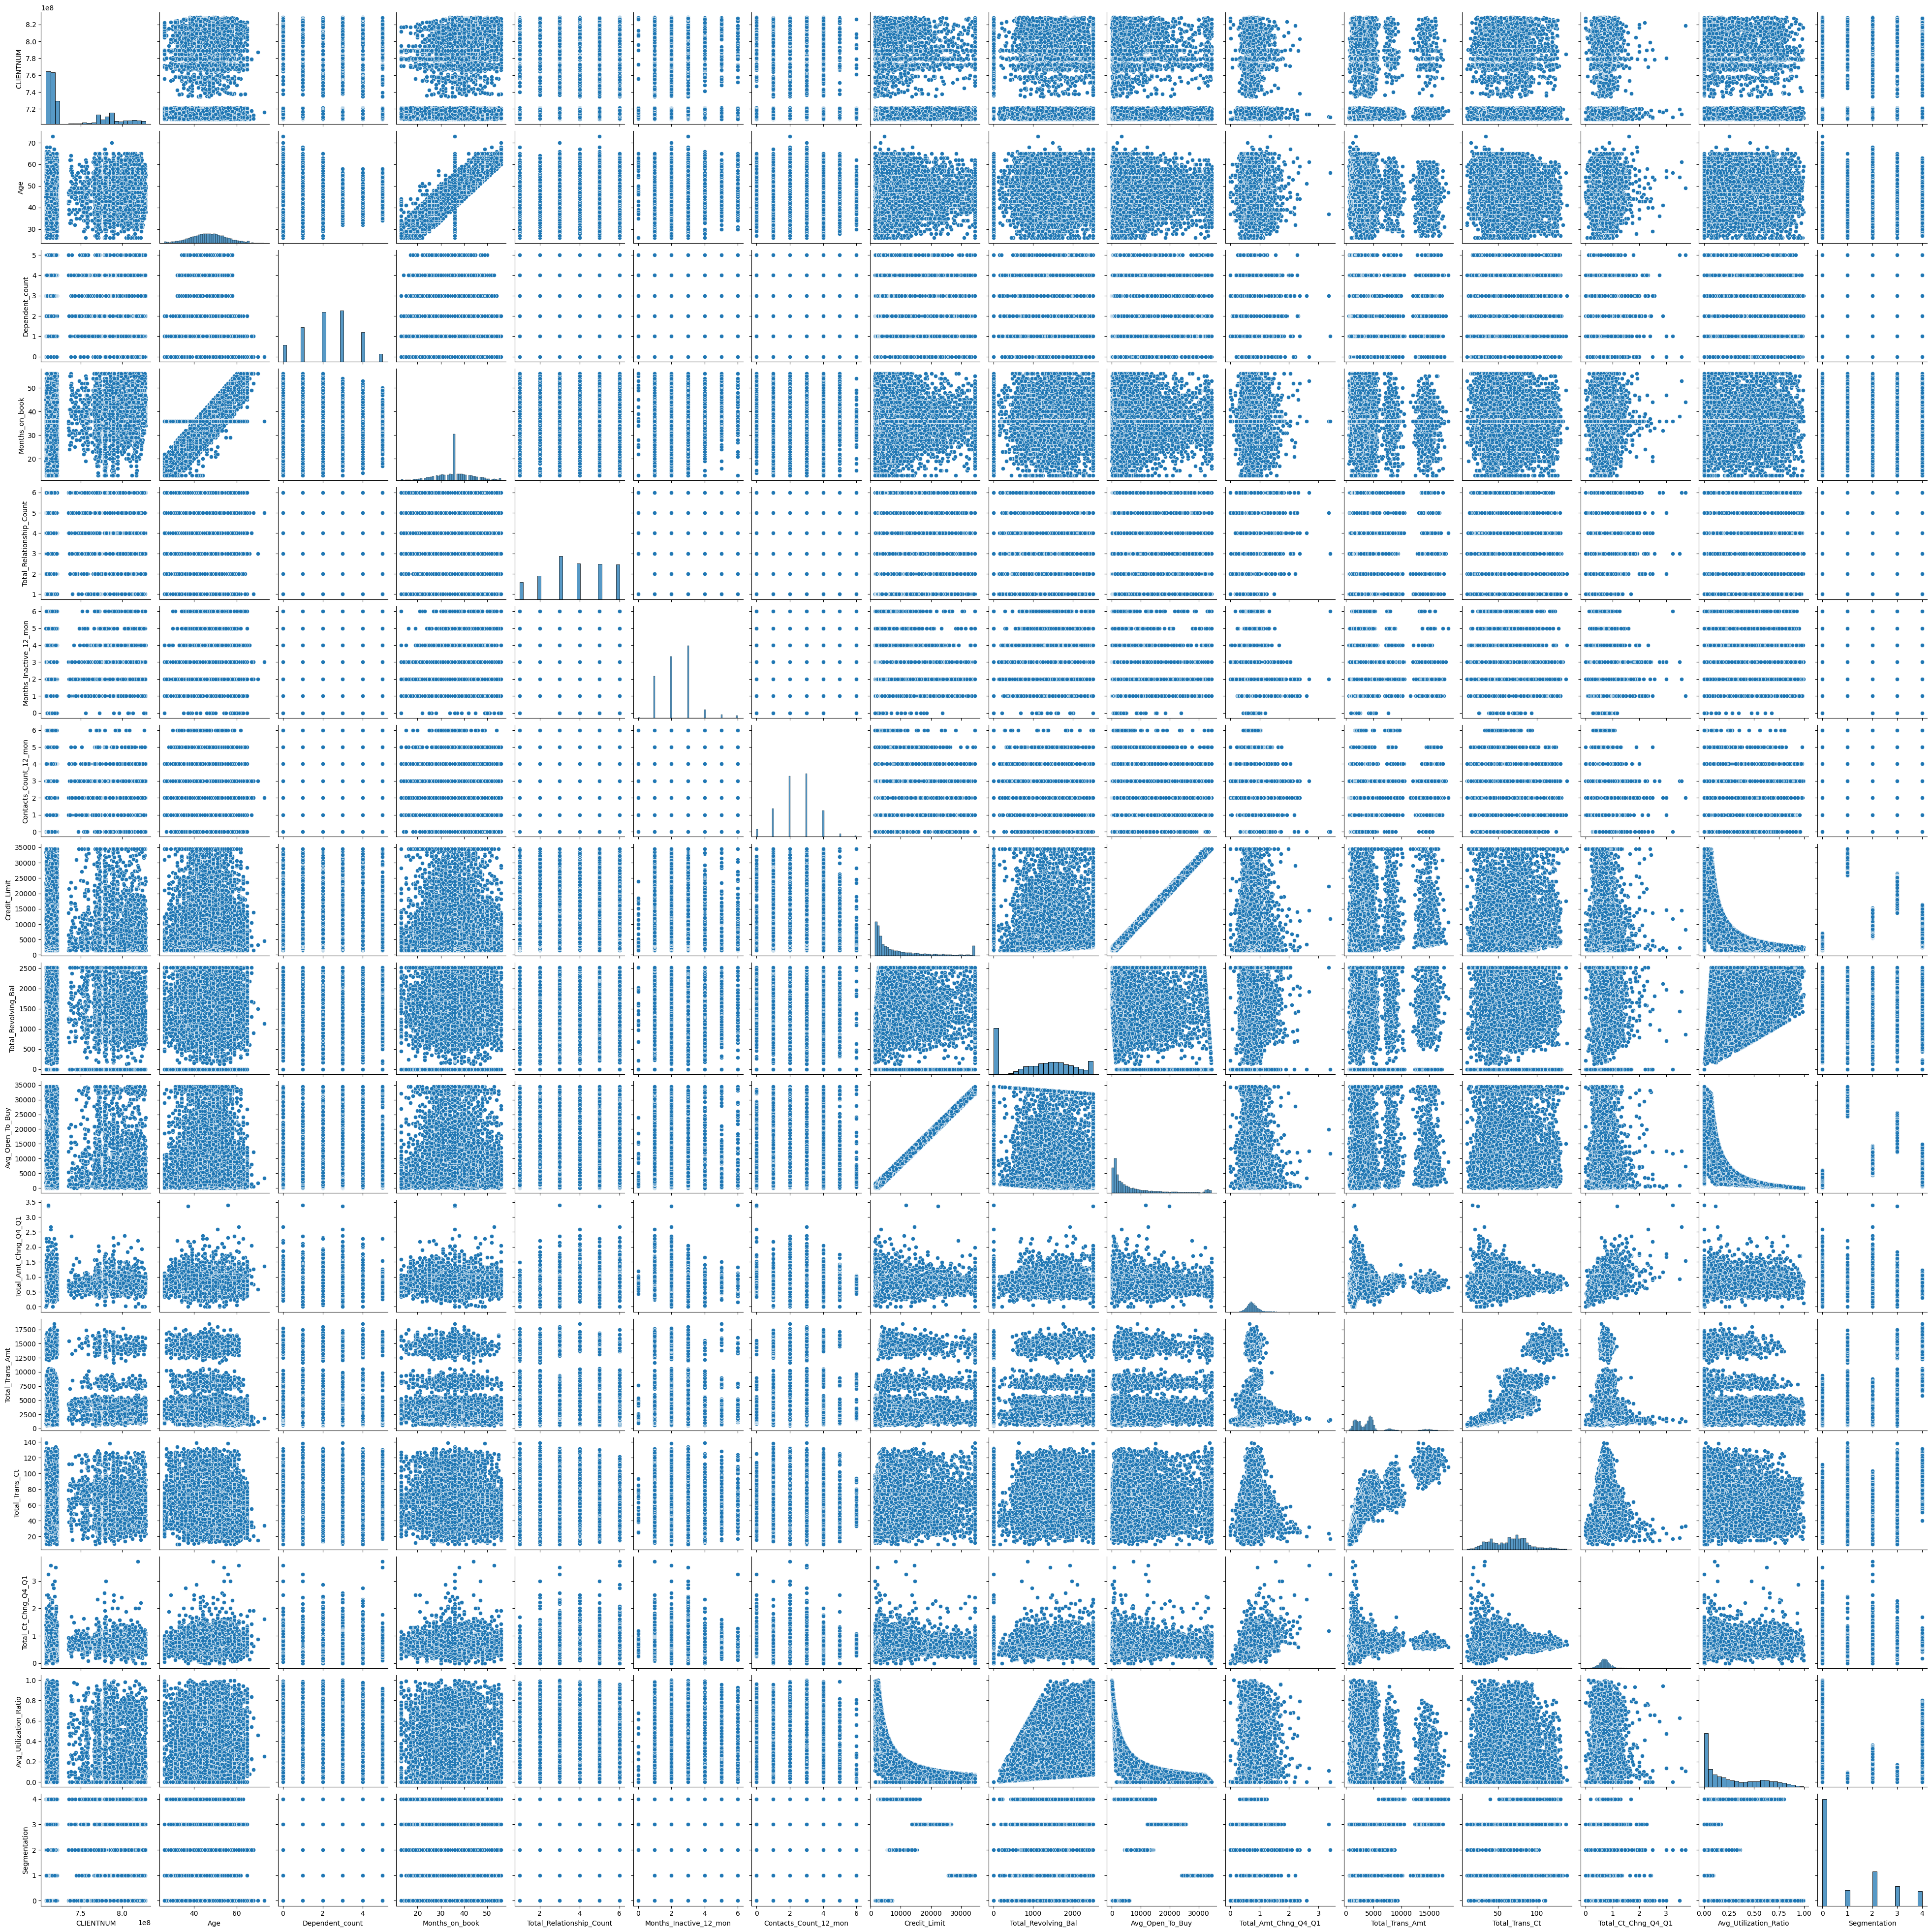

In [44]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
df.columns

In [ ]:
df.plot.scatter(x = 'Credit_Limit', y = 'Avg_Open_To_Buy');

<img src="https://i.ytimg.com/vi/qwqgoHv9tY0/maxresdefault.jpg">

# Task 5
**Calculate the correlation between the views  and comments column**

In [ ]:
a_mean = 
b_mean = 
n = 
print(a_mean, b_mean)
numerator = sum([(a - a_mean) *(b - b_mean) for a, b in zip(df['Credit_Limit'], df['Avg_Open_To_Buy'])])
denominator = 
cov = 
corr = 

In [ ]:
df[['Credit_Limit', 'Avg_Open_To_Buy']]

In [ ]:
corr # Range from -1 to 1

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['Credit_Limit'], df['Avg_Open_To_Buy']) 

**2nd Task**

13 56 43
0.099


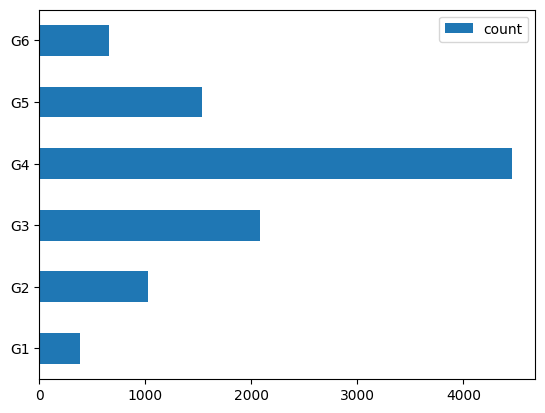

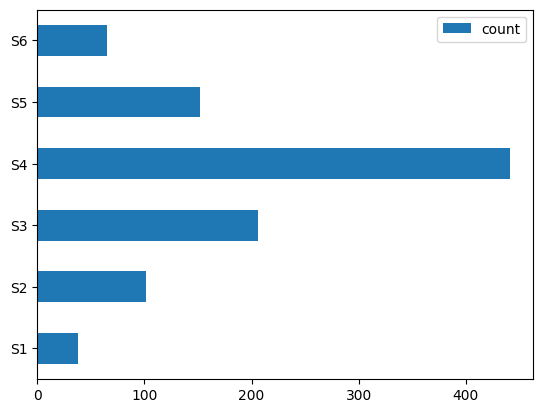

In [ ]:


min_ = df.Months_on_book.min()
max_ = df.Months_on_book.max()
diff_ = max_ - min_

print(min_, max_, diff_)

length_per_group = (max_ - min_) // 6
g1 = df[ df.Months_on_book <= min_ + length_per_group]
g2 = df[ (df.Months_on_book > min_ + length_per_group) & (df.Months_on_book <= min_ + 2 * length_per_group)]
g3 = df[ (df.Months_on_book > min_ + 2 * length_per_group) & (df.Months_on_book <= min_ + 3 * length_per_group)]
g4 = df[ (df.Months_on_book > min_ + 3 * length_per_group) & (df.Months_on_book <= min_ + 4 * length_per_group)]
g5 = df[ (df.Months_on_book > min_ + 4 * length_per_group) & (df.Months_on_book <= min_ + 5 * length_per_group)]
g6 = df[ df.Months_on_book > min_ + 5 * length_per_group]


g1


groups = {'G1':len(g1), 'G2':len(g2), 'G3':len(g3), 'G4':len(g4), 'G5':len(g5),'G6':len(g6)}
groups_df = pd.DataFrame(groups.values(), columns=['count'], index=groups.keys())
groups_df

sample_size = 1000
pop_size = len(df)
sample_percentage = round(sample_size / pop_size,3)
print(sample_percentage)

s1 = g1.sample(round(len(g1) * sample_percentage))
s2 = g2.sample(round(len(g2) * sample_percentage))
s3 = g3.sample(round(len(g3) * sample_percentage))
s4 = g4.sample(round(len(g4) * sample_percentage))
s5 = g5.sample(round(len(g5) * sample_percentage))
s6 = g6.sample(round(len(g6) * sample_percentage))

samples = ({'S1':len(s1), 'S2':len(s2), 'S3':len(s3), 'S4':len(s4), 'S5':len(s5),'S6':len(s6)})
samples_df = pd.DataFrame(samples.values(), columns=['count'], index=samples.keys())
samples_df

groups_df.plot(kind='barh')

samples_df.plot(kind='barh')